# Fruit Detection Model(Orange,Apple,Banana)

##Data Preparation

In [2]:
#Import all required File
import os
from glob import glob # extract path of each file
import pandas as pd # data preprocessing
from xml.etree import ElementTree as et # parse information from XML
from functools import reduce
import tensorflow as tf
import cv2
from shutil import move
import numpy as np

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:

train_xmlfiles = glob("/content/drive/MyDrive/Computer vision Project/Data/train/*.xml")

In [18]:

print(len(train_xmlfiles),train_xmlfiles[0:5])

240 ['/content/drive/MyDrive/Computer vision Project/Data/train/apple_13.xml', '/content/drive/MyDrive/Computer vision Project/Data/train/apple_14.xml', '/content/drive/MyDrive/Computer vision Project/Data/train/apple_1.xml', '/content/drive/MyDrive/Computer vision Project/Data/train/apple_10.xml', '/content/drive/MyDrive/Computer vision Project/Data/train/apple_11.xml']


In [19]:
test_xmlfiles = glob("/content/drive/MyDrive/Computer vision Project/Data/test/*.xml")

print(len(test_xmlfiles),test_xmlfiles[0:5])

60 ['/content/drive/MyDrive/Computer vision Project/Data/test/apple_82.xml', '/content/drive/MyDrive/Computer vision Project/Data/test/apple_83.xml', '/content/drive/MyDrive/Computer vision Project/Data/test/apple_78.xml', '/content/drive/MyDrive/Computer vision Project/Data/test/apple_81.xml', '/content/drive/MyDrive/Computer vision Project/Data/test/apple_80.xml']


In [20]:
#Extrating required info from XML files

def extract_text(filename):
    tree = et.parse(filename)
    root = tree.getroot()

    # extract filename
    image_name = root.find('filename').text
    # width and height of the image
    width = root.find('size').find('width').text
    height = root.find('size').find('height').text
    objs = root.findall('object')
    parser = []
    for obj in objs:
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        xmax = bndbox.find('xmax').text
        ymin = bndbox.find('ymin').text
        ymax = bndbox.find('ymax').text
        parser.append([image_name, width, height, name,xmin,xmax,ymin,ymax])

    return parser

In [21]:
parser_train = list(map(extract_text,train_xmlfiles))
parser_test = list(map(extract_text,test_xmlfiles))

In [22]:
parser_train
print(len(parser_train))

240


In [23]:
parser_test
print(len(parser_test))

60


In [24]:
parser_train

[[['apple_13.jpg', '800', '800', 'apple', '415', '720', '261', '567'],
  ['apple_13.jpg', '800', '800', 'apple', '105', '393', '426', '691'],
  ['apple_13.jpg', '800', '800', 'apple', '194', '477', '290', '545']],
 [['apple_14.jpg', '960', '640', 'apple', '318', '680', '146', '511']],
 [['apple_1.jpg', '0', '0', 'apple', '8', '331', '15', '349']],
 [['apple_10.jpg', '1500', '1500', 'apple', '56', '1413', '99', '1419']],
 [['apple_11.jpg', '652', '436', 'apple', '213', '459', '33', '258'],
  ['apple_11.jpg', '652', '436', 'apple', '1', '188', '30', '280'],
  ['apple_11.jpg', '652', '436', 'apple', '116', '337', '5', '220']],
 [['apple_12.jpg', '450', '428', 'apple', '43', '350', '21', '353']],
 [['apple_26.jpg', '350', '241', 'apple', '125', '302', '58', '221']],
 [['apple_45.jpg', '602', '452', 'apple', '34', '359', '95', '424'],
  ['apple_45.jpg', '602', '452', 'apple', '304', '575', '62', '353']],
 [['apple_22.jpg', '693', '693', 'apple', '136', '569', '199', '628']],
 [['apple_53.jp

In [25]:
# Making data in Proper List format

data_train = reduce(lambda x, y : x+y,parser_train)
data_test = reduce(lambda x, y : x+y,parser_test)

In [26]:

data_train

[['apple_13.jpg', '800', '800', 'apple', '415', '720', '261', '567'],
 ['apple_13.jpg', '800', '800', 'apple', '105', '393', '426', '691'],
 ['apple_13.jpg', '800', '800', 'apple', '194', '477', '290', '545'],
 ['apple_14.jpg', '960', '640', 'apple', '318', '680', '146', '511'],
 ['apple_1.jpg', '0', '0', 'apple', '8', '331', '15', '349'],
 ['apple_10.jpg', '1500', '1500', 'apple', '56', '1413', '99', '1419'],
 ['apple_11.jpg', '652', '436', 'apple', '213', '459', '33', '258'],
 ['apple_11.jpg', '652', '436', 'apple', '1', '188', '30', '280'],
 ['apple_11.jpg', '652', '436', 'apple', '116', '337', '5', '220'],
 ['apple_12.jpg', '450', '428', 'apple', '43', '350', '21', '353'],
 ['apple_26.jpg', '350', '241', 'apple', '125', '302', '58', '221'],
 ['apple_45.jpg', '602', '452', 'apple', '34', '359', '95', '424'],
 ['apple_45.jpg', '602', '452', 'apple', '304', '575', '62', '353'],
 ['apple_22.jpg', '693', '693', 'apple', '136', '569', '199', '628'],
 ['apple_53.jpg', '300', '261', 'apple

In [27]:
#Making DataFrame from extracted Details
df_train = pd.DataFrame(data_train,columns = ['filename','width','height','name','xmin','xmax','ymin','ymax'])
df_test = pd.DataFrame(data_test,columns = ['filename','width','height','name','xmin','xmax','ymin','ymax'])

In [28]:
df_train.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,apple_13.jpg,800,800,apple,415,720,261,567
1,apple_13.jpg,800,800,apple,105,393,426,691
2,apple_13.jpg,800,800,apple,194,477,290,545
3,apple_14.jpg,960,640,apple,318,680,146,511
4,apple_1.jpg,0,0,apple,8,331,15,349


In [29]:
df_test.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,apple_82.jpg,416,470,apple,65,365,122,404
1,apple_83.jpg,800,745,apple,1,794,1,738
2,apple_78.jpg,350,350,apple,10,344,8,336
3,apple_81.jpg,1500,1749,apple,70,1388,398,1731
4,apple_80.jpg,600,500,apple,155,453,105,436


In [30]:
df_train['name'].value_counts()

name
banana    169
apple     156
orange    140
Name: count, dtype: int64

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  465 non-null    object
 1   width     465 non-null    object
 2   height    465 non-null    object
 3   name      465 non-null    object
 4   xmin      465 non-null    object
 5   xmax      465 non-null    object
 6   ymin      465 non-null    object
 7   ymax      465 non-null    object
dtypes: object(8)
memory usage: 29.2+ KB


In [32]:
# type conversion ,coverting into int
cols = ['width','height','xmin','xmax','ymin','ymax']
df_train[cols] = df_train[cols].astype(int)
df_test[cols] = df_test[cols].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  465 non-null    object
 1   width     465 non-null    int64 
 2   height    465 non-null    int64 
 3   name      465 non-null    object
 4   xmin      465 non-null    int64 
 5   xmax      465 non-null    int64 
 6   ymin      465 non-null    int64 
 7   ymax      465 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 29.2+ KB


In [33]:
#Droping corrupted/missing data
df_train=df_train.drop(df_train[(df_train[cols] == 0).any(axis=1)].index)
df_train

,filename,width,height,name,xmin,xmax,ymin,ymax
0,apple_13.jpg,800,800,apple,415,720,261,567
1,apple_13.jpg,800,800,apple,105,393,426,691
2,apple_13.jpg,800,800,apple,194,477,290,545
3,apple_14.jpg,960,640,apple,318,680,146,511
5,apple_10.jpg,1500,1500,apple,56,1413,99,1419
...,...,...,...,...,...,...,...,...
460,orange_44.jpg,343,257,orange,136,240,117,224
461,orange_9.jpg,500,427,orange,35,268,96,315
462,orange_6.jpg,333,240,orange,71,258,18,220
463,orange_8.jpg,600,393,orange,42,282,86,330


In [34]:
df_train['name'].value_counts()

name
banana    157
apple     146
orange    117
Name: count, dtype: int64

In [35]:
df_test.shape

(117, 8)

In [36]:
df_test=df_test.drop(df_test[(df_test[cols] == 0).any(axis=1)].index)
df_test.shape

(110, 8)

In [37]:
#converting data for yolo format
# center x, center y
def center (df):
  df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
  df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
  # w
  df['w'] = (df['xmax']-df['xmin'])/df['width']
  # h
  df['h'] = (df['ymax']-df['ymin'])/df['height']

In [38]:
center(df_train)
df_train

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,apple_13.jpg,800,800,apple,415,720,261,567,0.709375,0.517500,0.381250,0.382500
1,apple_13.jpg,800,800,apple,105,393,426,691,0.311250,0.698125,0.360000,0.331250
2,apple_13.jpg,800,800,apple,194,477,290,545,0.419375,0.521875,0.353750,0.318750
3,apple_14.jpg,960,640,apple,318,680,146,511,0.519792,0.513281,0.377083,0.570312
5,apple_10.jpg,1500,1500,apple,56,1413,99,1419,0.489667,0.506000,0.904667,0.880000
...,...,...,...,...,...,...,...,...,...,...,...,...
460,orange_44.jpg,343,257,orange,136,240,117,224,0.548105,0.663424,0.303207,0.416342
461,orange_9.jpg,500,427,orange,35,268,96,315,0.303000,0.481265,0.466000,0.512881
462,orange_6.jpg,333,240,orange,71,258,18,220,0.493994,0.495833,0.561562,0.841667
463,orange_8.jpg,600,393,orange,42,282,86,330,0.270000,0.529262,0.400000,0.620865


In [39]:
center(df_test)
df_test

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,apple_82.jpg,416,470,apple,65,365,122,404,0.516827,0.559574,0.721154,0.600000
1,apple_83.jpg,800,745,apple,1,794,1,738,0.496875,0.495973,0.991250,0.989262
2,apple_78.jpg,350,350,apple,10,344,8,336,0.505714,0.491429,0.954286,0.937143
3,apple_81.jpg,1500,1749,apple,70,1388,398,1731,0.486000,0.608634,0.878667,0.762150
4,apple_80.jpg,600,500,apple,155,453,105,436,0.506667,0.541000,0.496667,0.662000
...,...,...,...,...,...,...,...,...,...,...,...,...
112,orange_86.jpg,480,360,orange,167,329,88,237,0.516667,0.451389,0.337500,0.413889
113,mixed_22.jpg,1009,1024,banana,1,923,571,1006,0.457879,0.770020,0.913776,0.424805
114,mixed_22.jpg,1009,1024,apple,80,481,6,395,0.277998,0.195801,0.397423,0.379883
115,mixed_22.jpg,1009,1024,orange,543,942,17,430,0.735877,0.218262,0.395441,0.403320


In [40]:
# label encoding
def label_encoding(x):
    labels = {'orange':0, 'banana':1, 'apple':2}
    return labels[x]

In [41]:
df_train['id'] = df_train['name'].apply(label_encoding)
df_test['id'] = df_test['name'].apply(label_encoding)

In [42]:
df_train.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,apple_13.jpg,800,800,apple,415,720,261,567,0.709375,0.517500,0.381250,0.382500,2
1,apple_13.jpg,800,800,apple,105,393,426,691,0.311250,0.698125,0.360000,0.331250,2
2,apple_13.jpg,800,800,apple,194,477,290,545,0.419375,0.521875,0.353750,0.318750,2
3,apple_14.jpg,960,640,apple,318,680,146,511,0.519792,0.513281,0.377083,0.570312,2
5,apple_10.jpg,1500,1500,apple,56,1413,99,1419,0.489667,0.506000,0.904667,0.880000,2


## Save Image and Labels in text in different directory

In [43]:
img_train = "/content/drive/MyDrive/Computer vision Project/Data/images/train"
img_test = "/content/drive/MyDrive/Computer vision Project/Data/images/test"
labels_train = "/content/drive/MyDrive/Computer vision Project/Data/labels/train"
labels_test = "/content/drive/MyDrive/Computer vision Project/Data/labels/test"





In [ ]:
#making new directory
os.mkdir(img_train)
os.mkdir(img_test)

os.mkdir(labels_train)
os.mkdir(labels_test)

In [44]:
#Grouping required data
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = df_train[cols].groupby('filename')
groupby_obj_test = df_test[cols].groupby('filename')


Train Images folder

In [ ]:
def save_data(filename, folder_path, group_obj):
    # move image
    src = os.path.join("/content/drive/MyDrive/Computer vision Project/Data/train",filename)
    dst = os.path.join(folder_path,filename)
    move(src,dst) # move image to the destination folder



In [ ]:
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [ ]:
filename_series.apply(save_data,args=(img_train,groupby_obj_train))

0      None
1      None
2      None
3      None
4      None
       ... 
202    None
203    None
204    None
205    None
206    None
Length: 207, dtype: object

Test Images Folder

In [ ]:
def save_datatest(filename, folder_path, group_obj):
    # move image
    src = os.path.join("/content/drive/MyDrive/Computer vision Project/Data/test",filename)
    dst = os.path.join(folder_path,filename)
    move(src,dst) # move image to the destination folder

In [ ]:
filename_series = pd.Series(groupby_obj_test.groups.keys())

In [ ]:
filename_series.apply(save_datatest,args=(img_test,groupby_obj_test))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
dtype: object

Train label Folder

In [45]:
def save_labeltrain(filename, folder_path, group_obj):
  text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
  group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)

In [46]:
filename_series_train = pd.Series(groupby_obj_train.groups.keys())
filename_series_train.apply(save_labeltrain,args=(labels_train,groupby_obj_train))

0      None
1      None
2      None
3      None
4      None
       ... 
202    None
203    None
204    None
205    None
206    None
Length: 207, dtype: object

Test Label Folder

In [ ]:
def save_labeltest(filename, folder_path, group_obj):
  text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
  group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)

In [ ]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_labeltest,args=(labels_test,groupby_obj_test))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
54    None
55    None
dtype: object

## Importing and Training YOLO Model

In [4]:
os.chdir("/content/drive/MyDrive/Computer vision Project")

In [5]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [6]:
ls

'banana apple and orange smoothie.mp4'
'BANANA APPLE AND ORANGE SMOOTHIE.mp4'
 bus.jpg
 Data/
'English Learning - Fruit_ Apple, Orange, Banana, Pear.mp4'
'English Learning - Fruit_ Apple, Orange, Banana, Pearout.mp4'
'Fruits Object Detection.ipynb'
 runs/
 yolov8n.pt
 yolov9/


In [7]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [10]:
from ultralytics import YOLO

In [48]:
# Model selecting from Yolo model zoo
model = YOLO("yolov8n.yaml")

In [49]:
#Training Model for 500 epochs
result = model.train(data="/content/drive/MyDrive/Computer vision Project/Data/data.yaml", epochs=300)

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Computer vision Project/Data/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

train: Scanning /content/drive/MyDrive/Computer vision Project/Data/labels/train... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:04<00:00, 47.92it/s]


train: New cache created: /content/drive/MyDrive/Computer vision Project/Data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Computer vision Project/Data/labels/test.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]

Plotting labels to runs/detect/train5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300         0G      3.035      4.048      4.234         53        640: 100%|██████████| 13/13 [03:42<00:00, 17.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:36<00:00, 18.24s/it]

                   all         56        110    0.00545      0.722     0.0122     0.0031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300         0G      3.011      3.969      4.173         85        640:  62%|██████▏   | 8/13 [02:14<01:24, 16.84s/it]


KeyboardInterrupt: 

In [ ]:
#Validating Model
metrics = model.val()

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/Computer vision Project/Data/labels/test.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


                   all         56        110      0.474      0.286      0.352      0.203
                orange         56         41      0.584      0.756      0.749      0.484
                banana         56         36      0.317     0.0402      0.174     0.0499
                 apple         56         33       0.52     0.0606      0.134     0.0746
Speed: 0.3ms preprocess, 5.9ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to runs/detect/train


In [ ]:
#Exporting Model in onnx format
path = model.export(format="onnx")

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 78.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 10.7s, saved as 'runs/detect/train2/weights/best.onnx' (11.7 MB)

Export complete (13.1s)
Results saved to /content/drive/MyDrive/Computer vision Project/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640  
Validate:  

## Visualizing our Models performance

In [ ]:
ls

 bus.jpg   Data/  'Fruits Object Detection.ipynb'   runs/   yolov8n.pt   yolov9/


In [ ]:
!ls runs/detect/train2/

args.yaml					   PR_curve.png		train_batch6371.jpg
confusion_matrix_normalized.png			   R_curve.png		train_batch6372.jpg
confusion_matrix.png				   results.csv		val_batch0_labels.jpg
events.out.tfevents.1714578273.2841a36bfff4.171.0  results.png		val_batch0_pred.jpg
F1_curve.png					   train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				   train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					   train_batch2.jpg	weights
P_curve.png					   train_batch6370.jpg


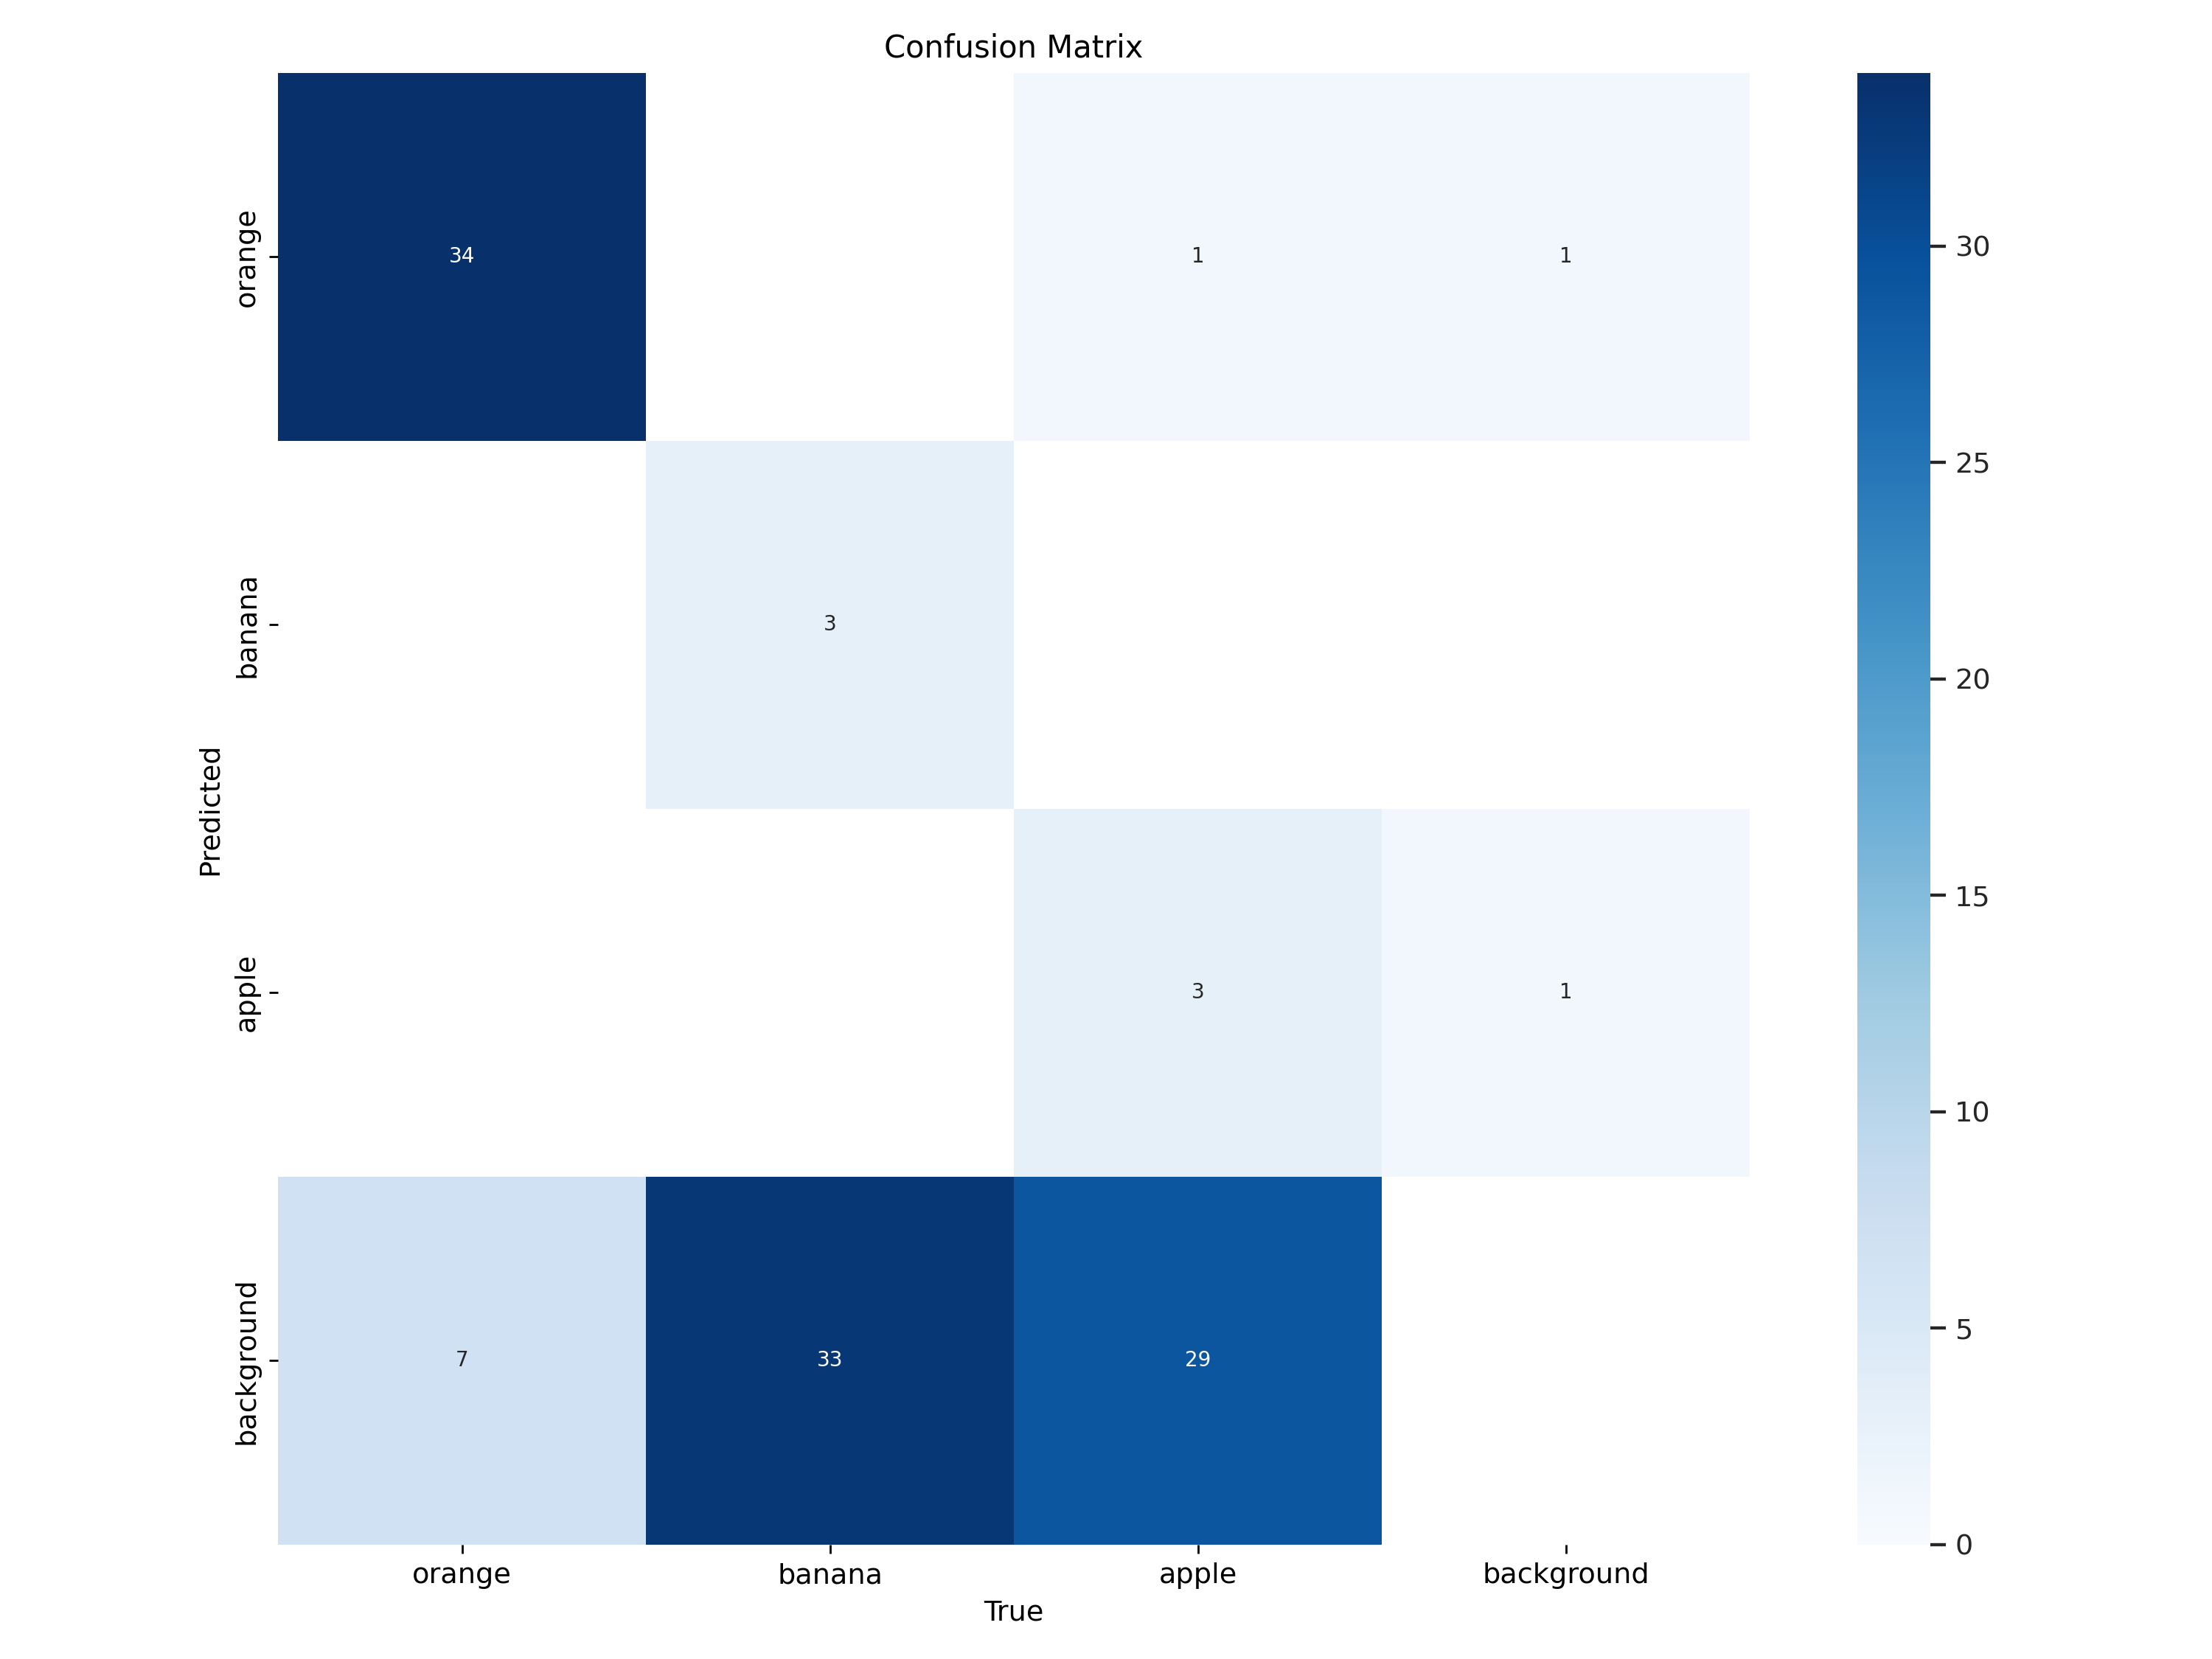

In [ ]:
# Confusion matrix
from IPython.display import Image
Image(filename ="runs/detect/train2/confusion_matrix.png")

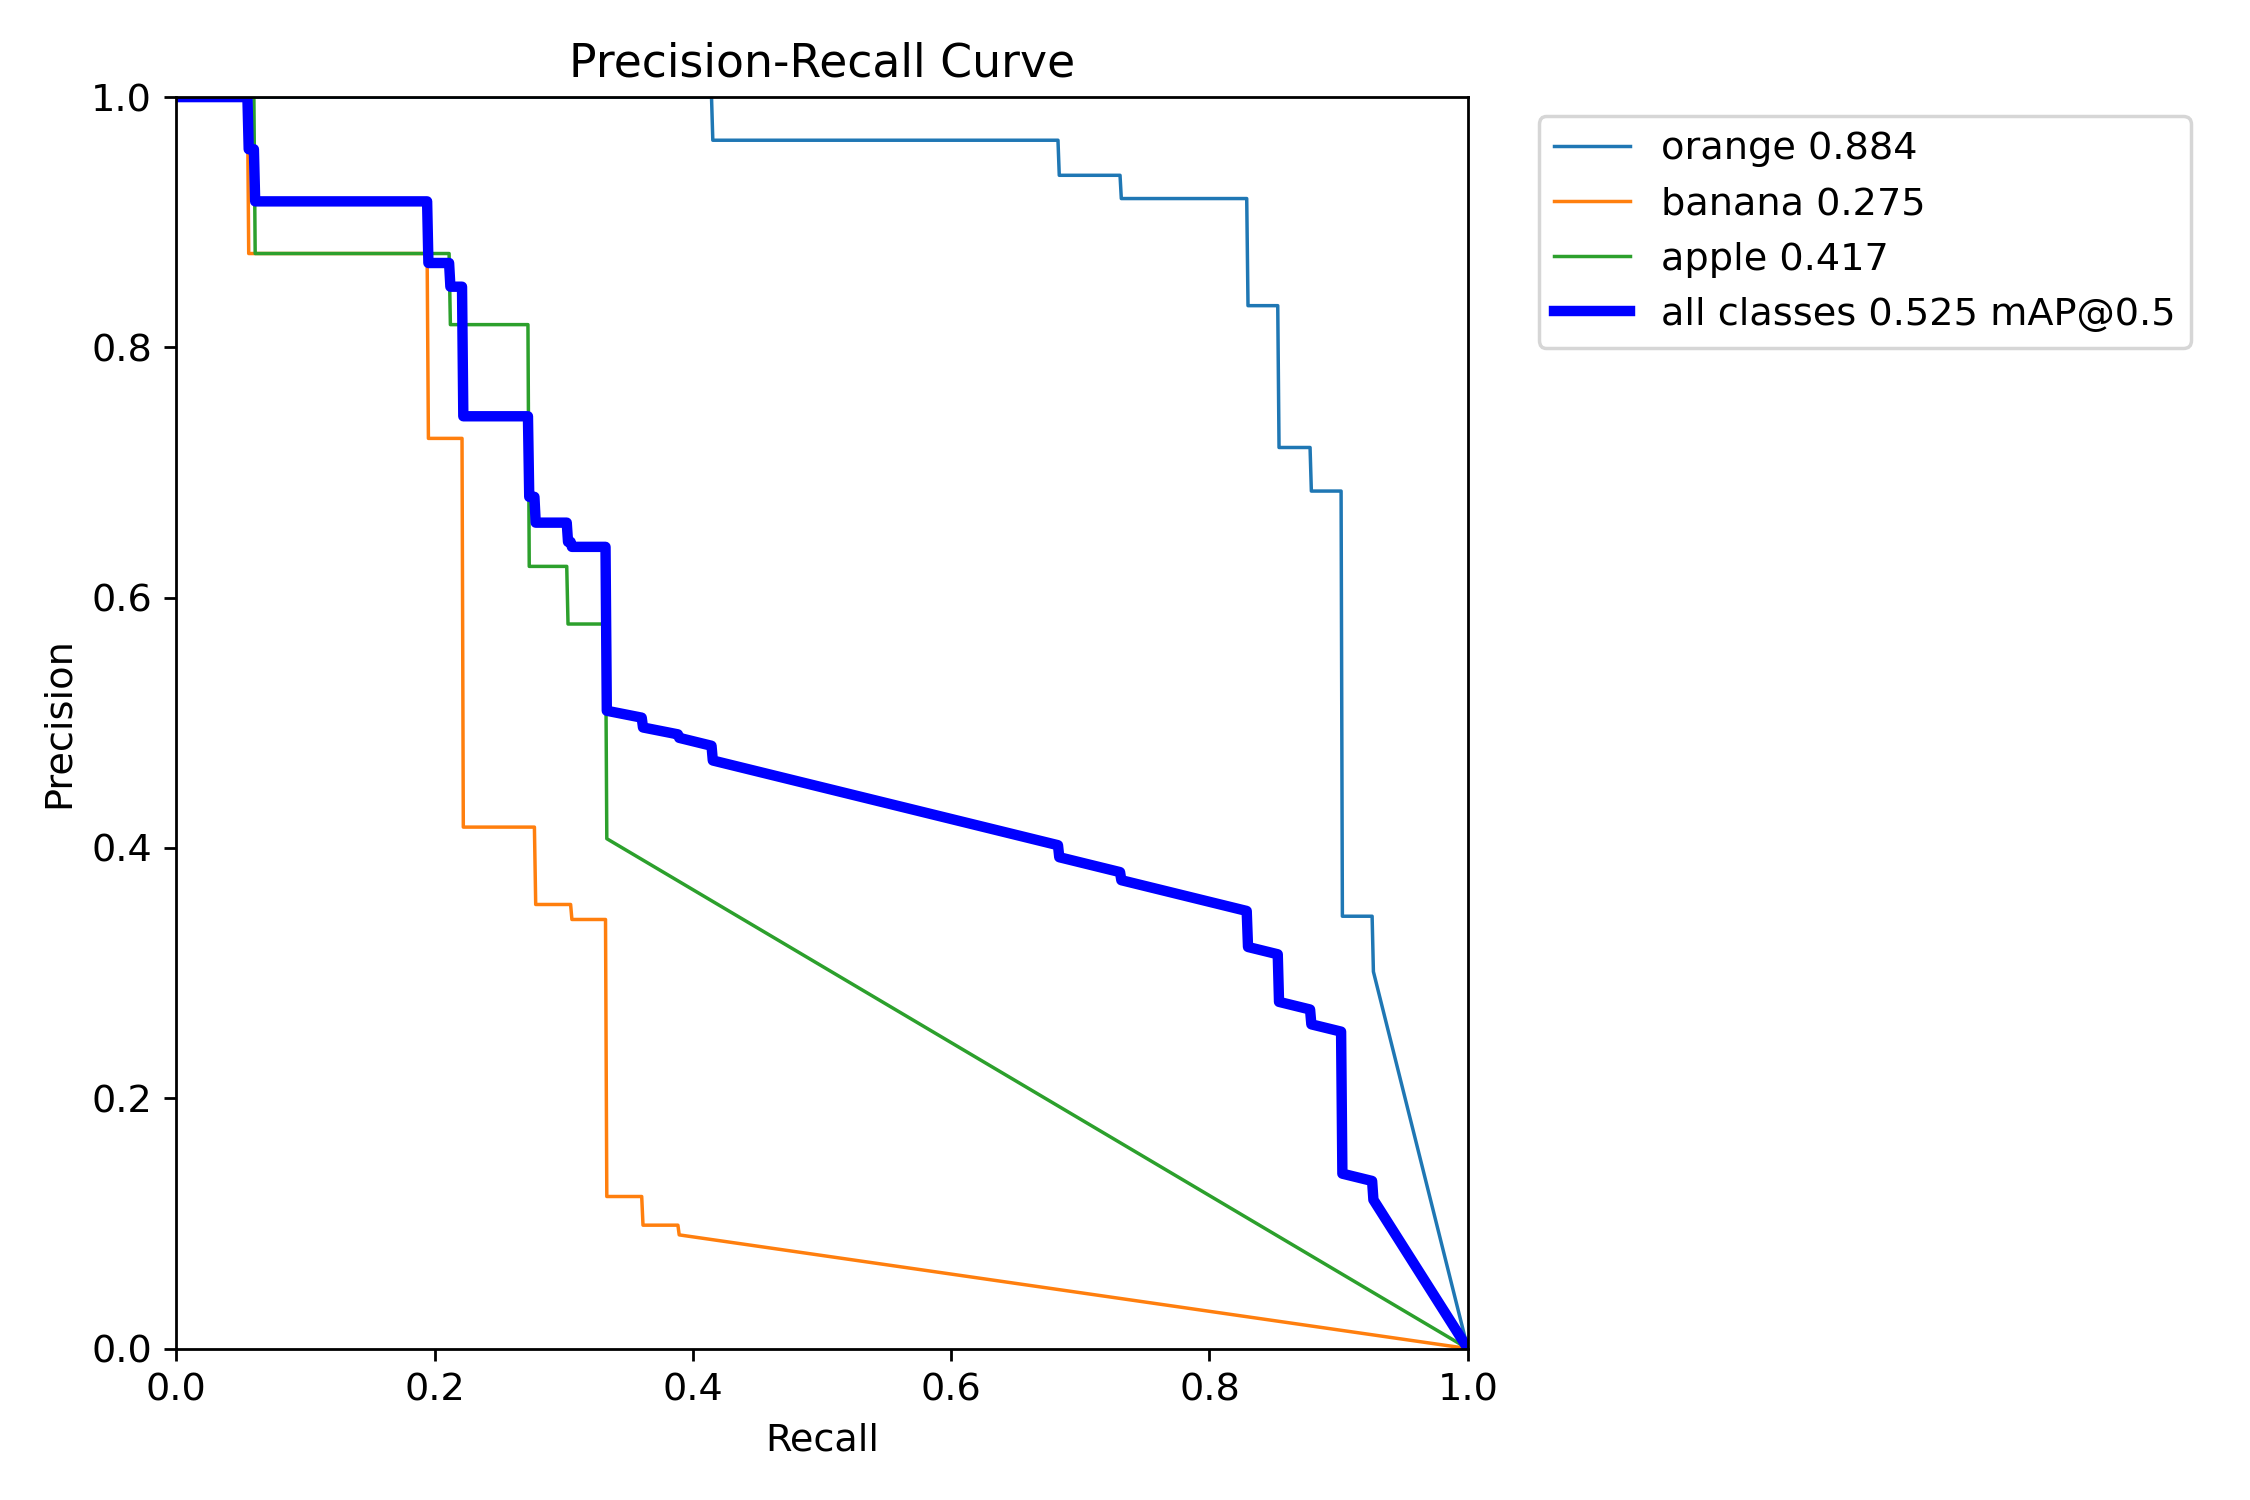

In [ ]:
#P-R curve
Image(filename ="runs/detect/train2/PR_curve.png")

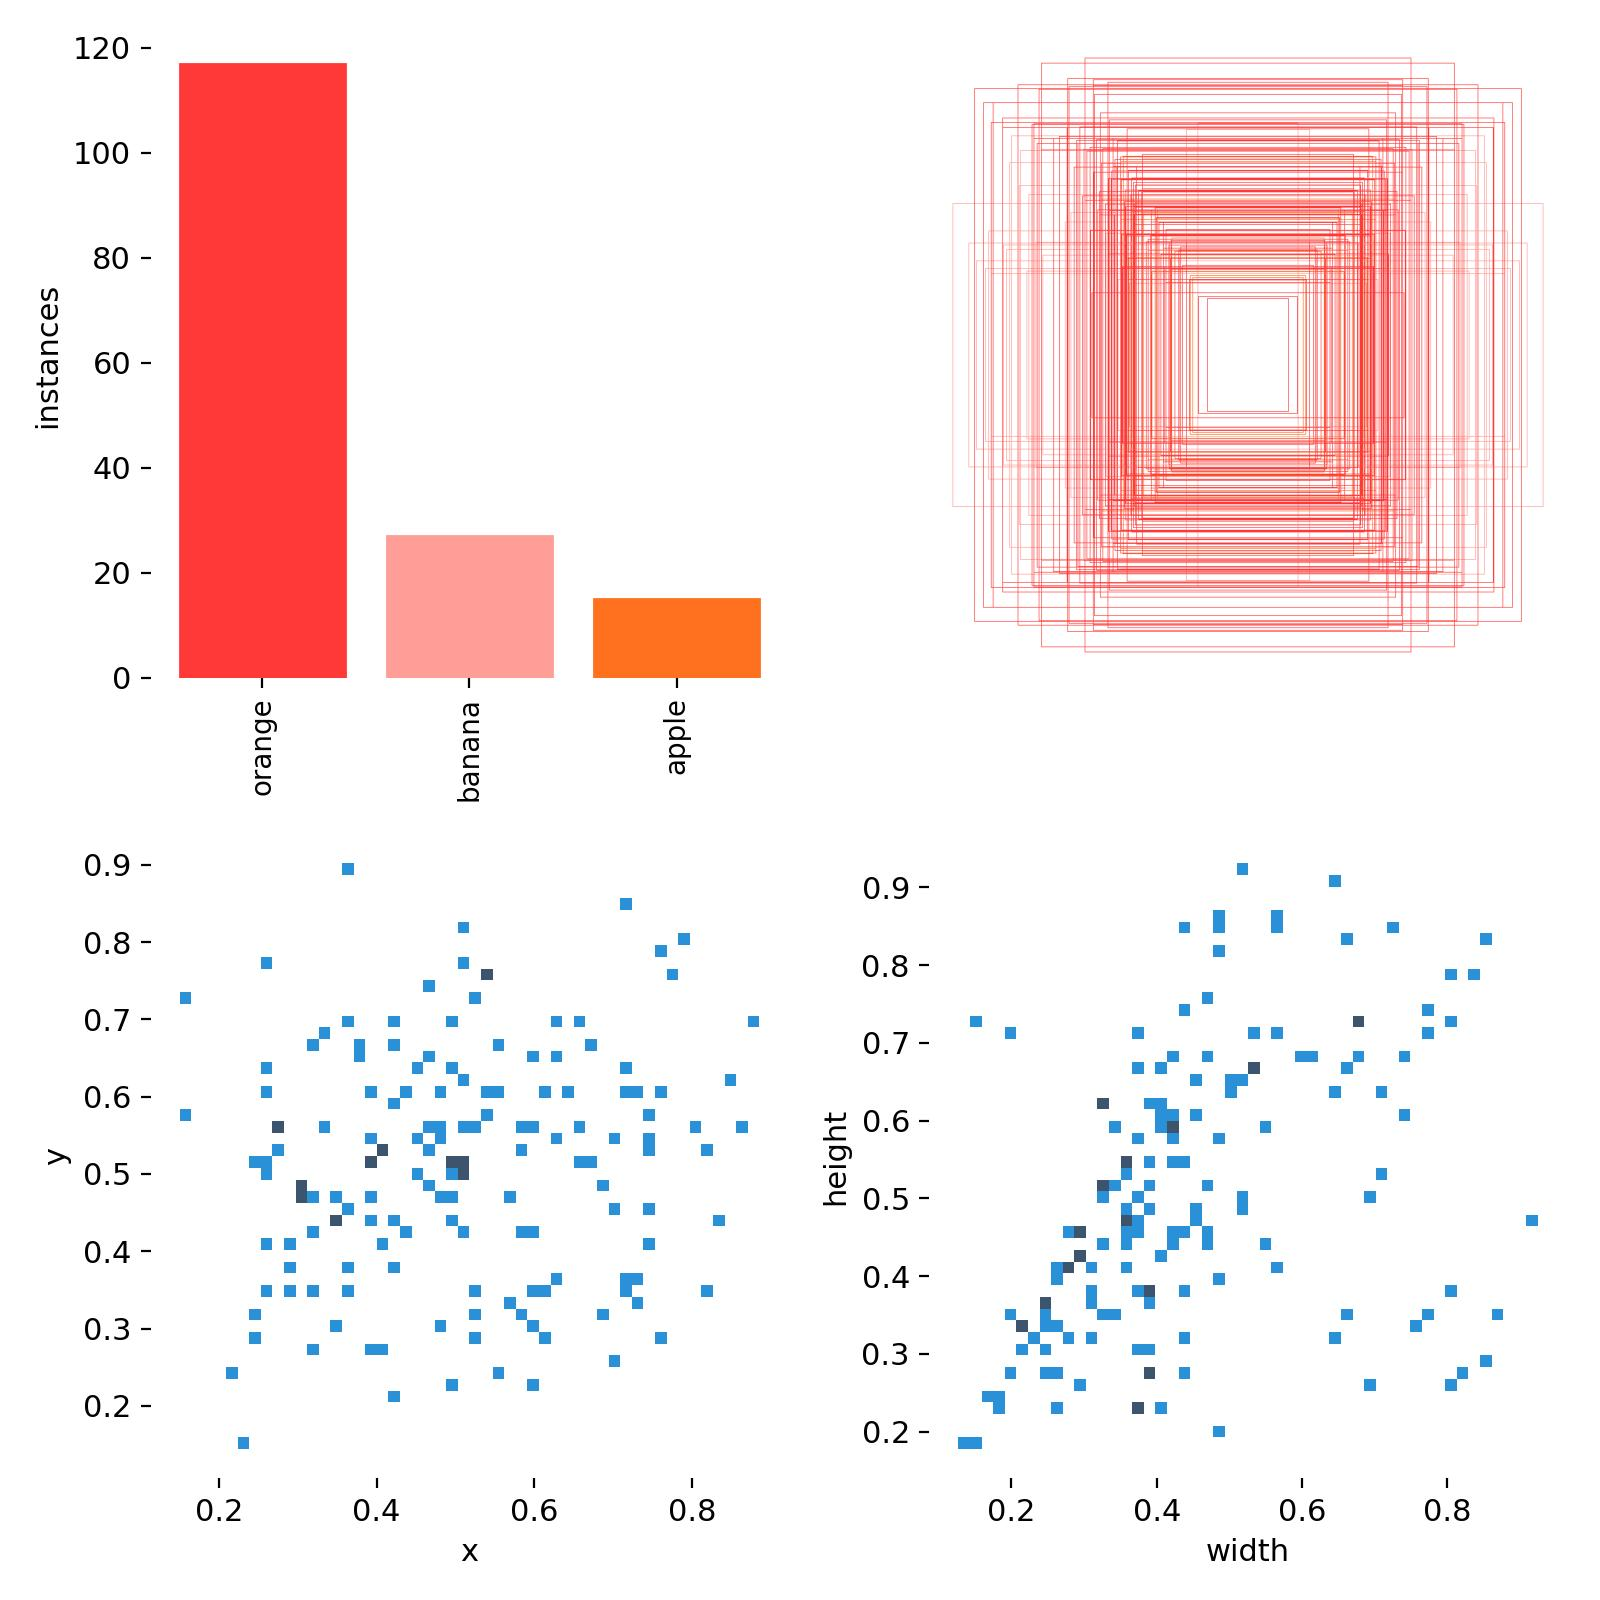

In [ ]:
Image(filename ="runs/detect/train2/labels.jpg")

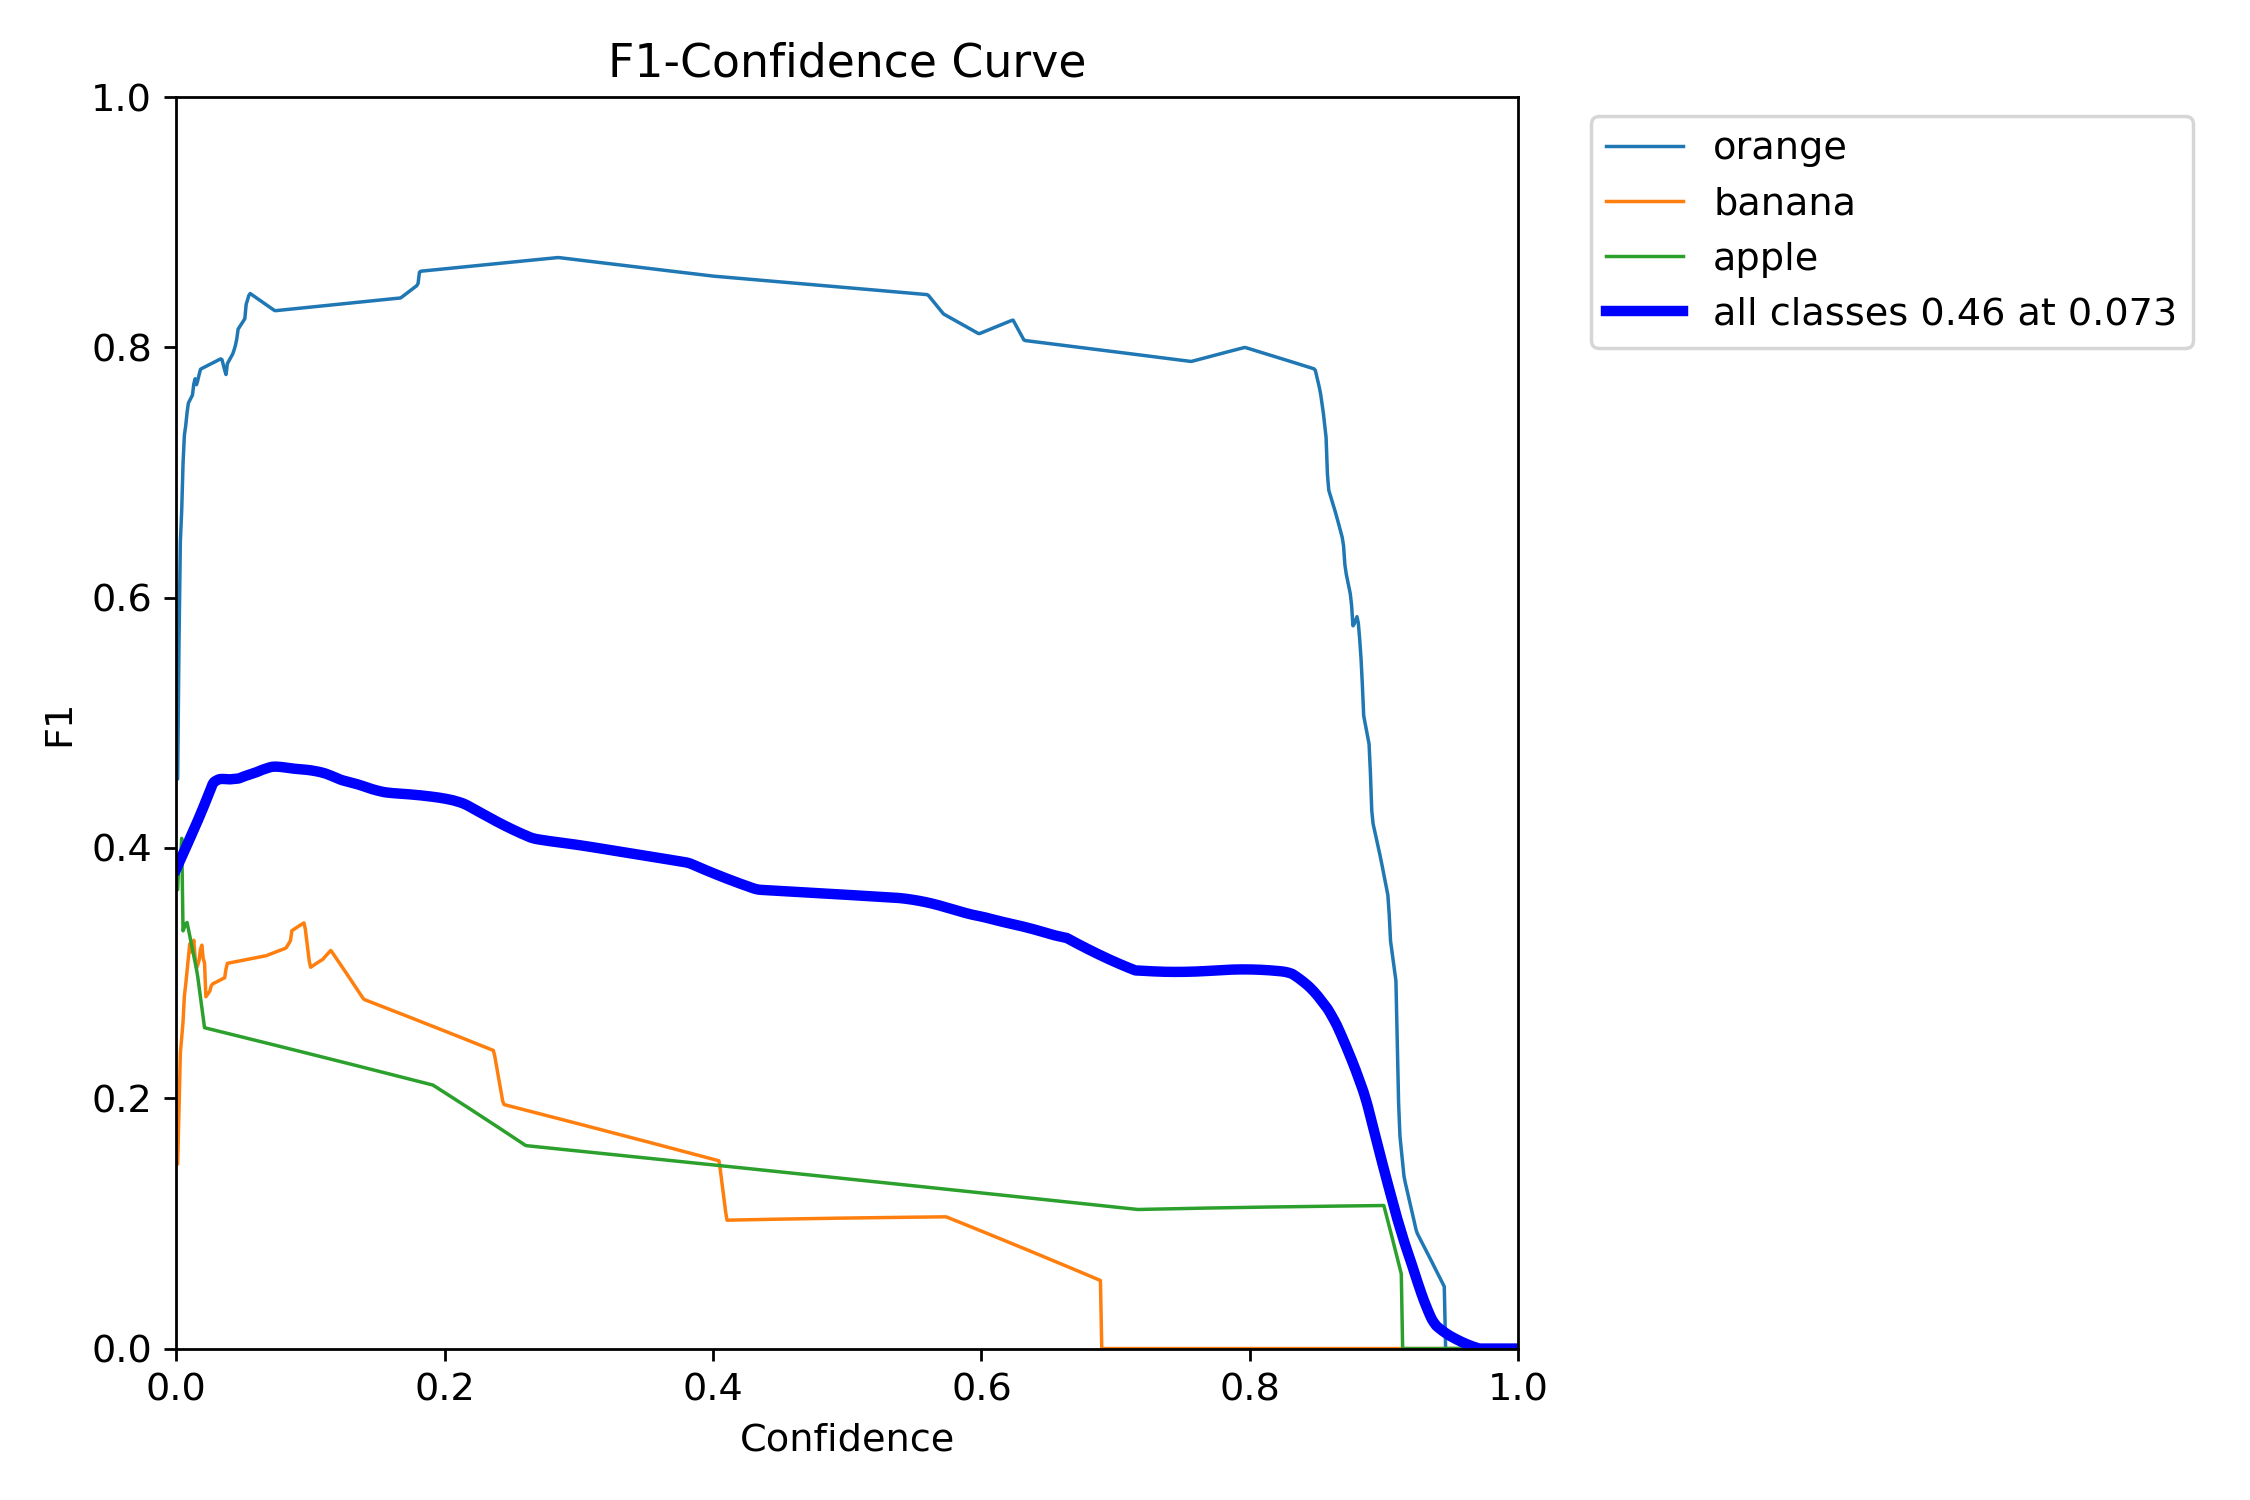

In [ ]:
Image(filename ="runs/detect/train2/F1_curve.png")

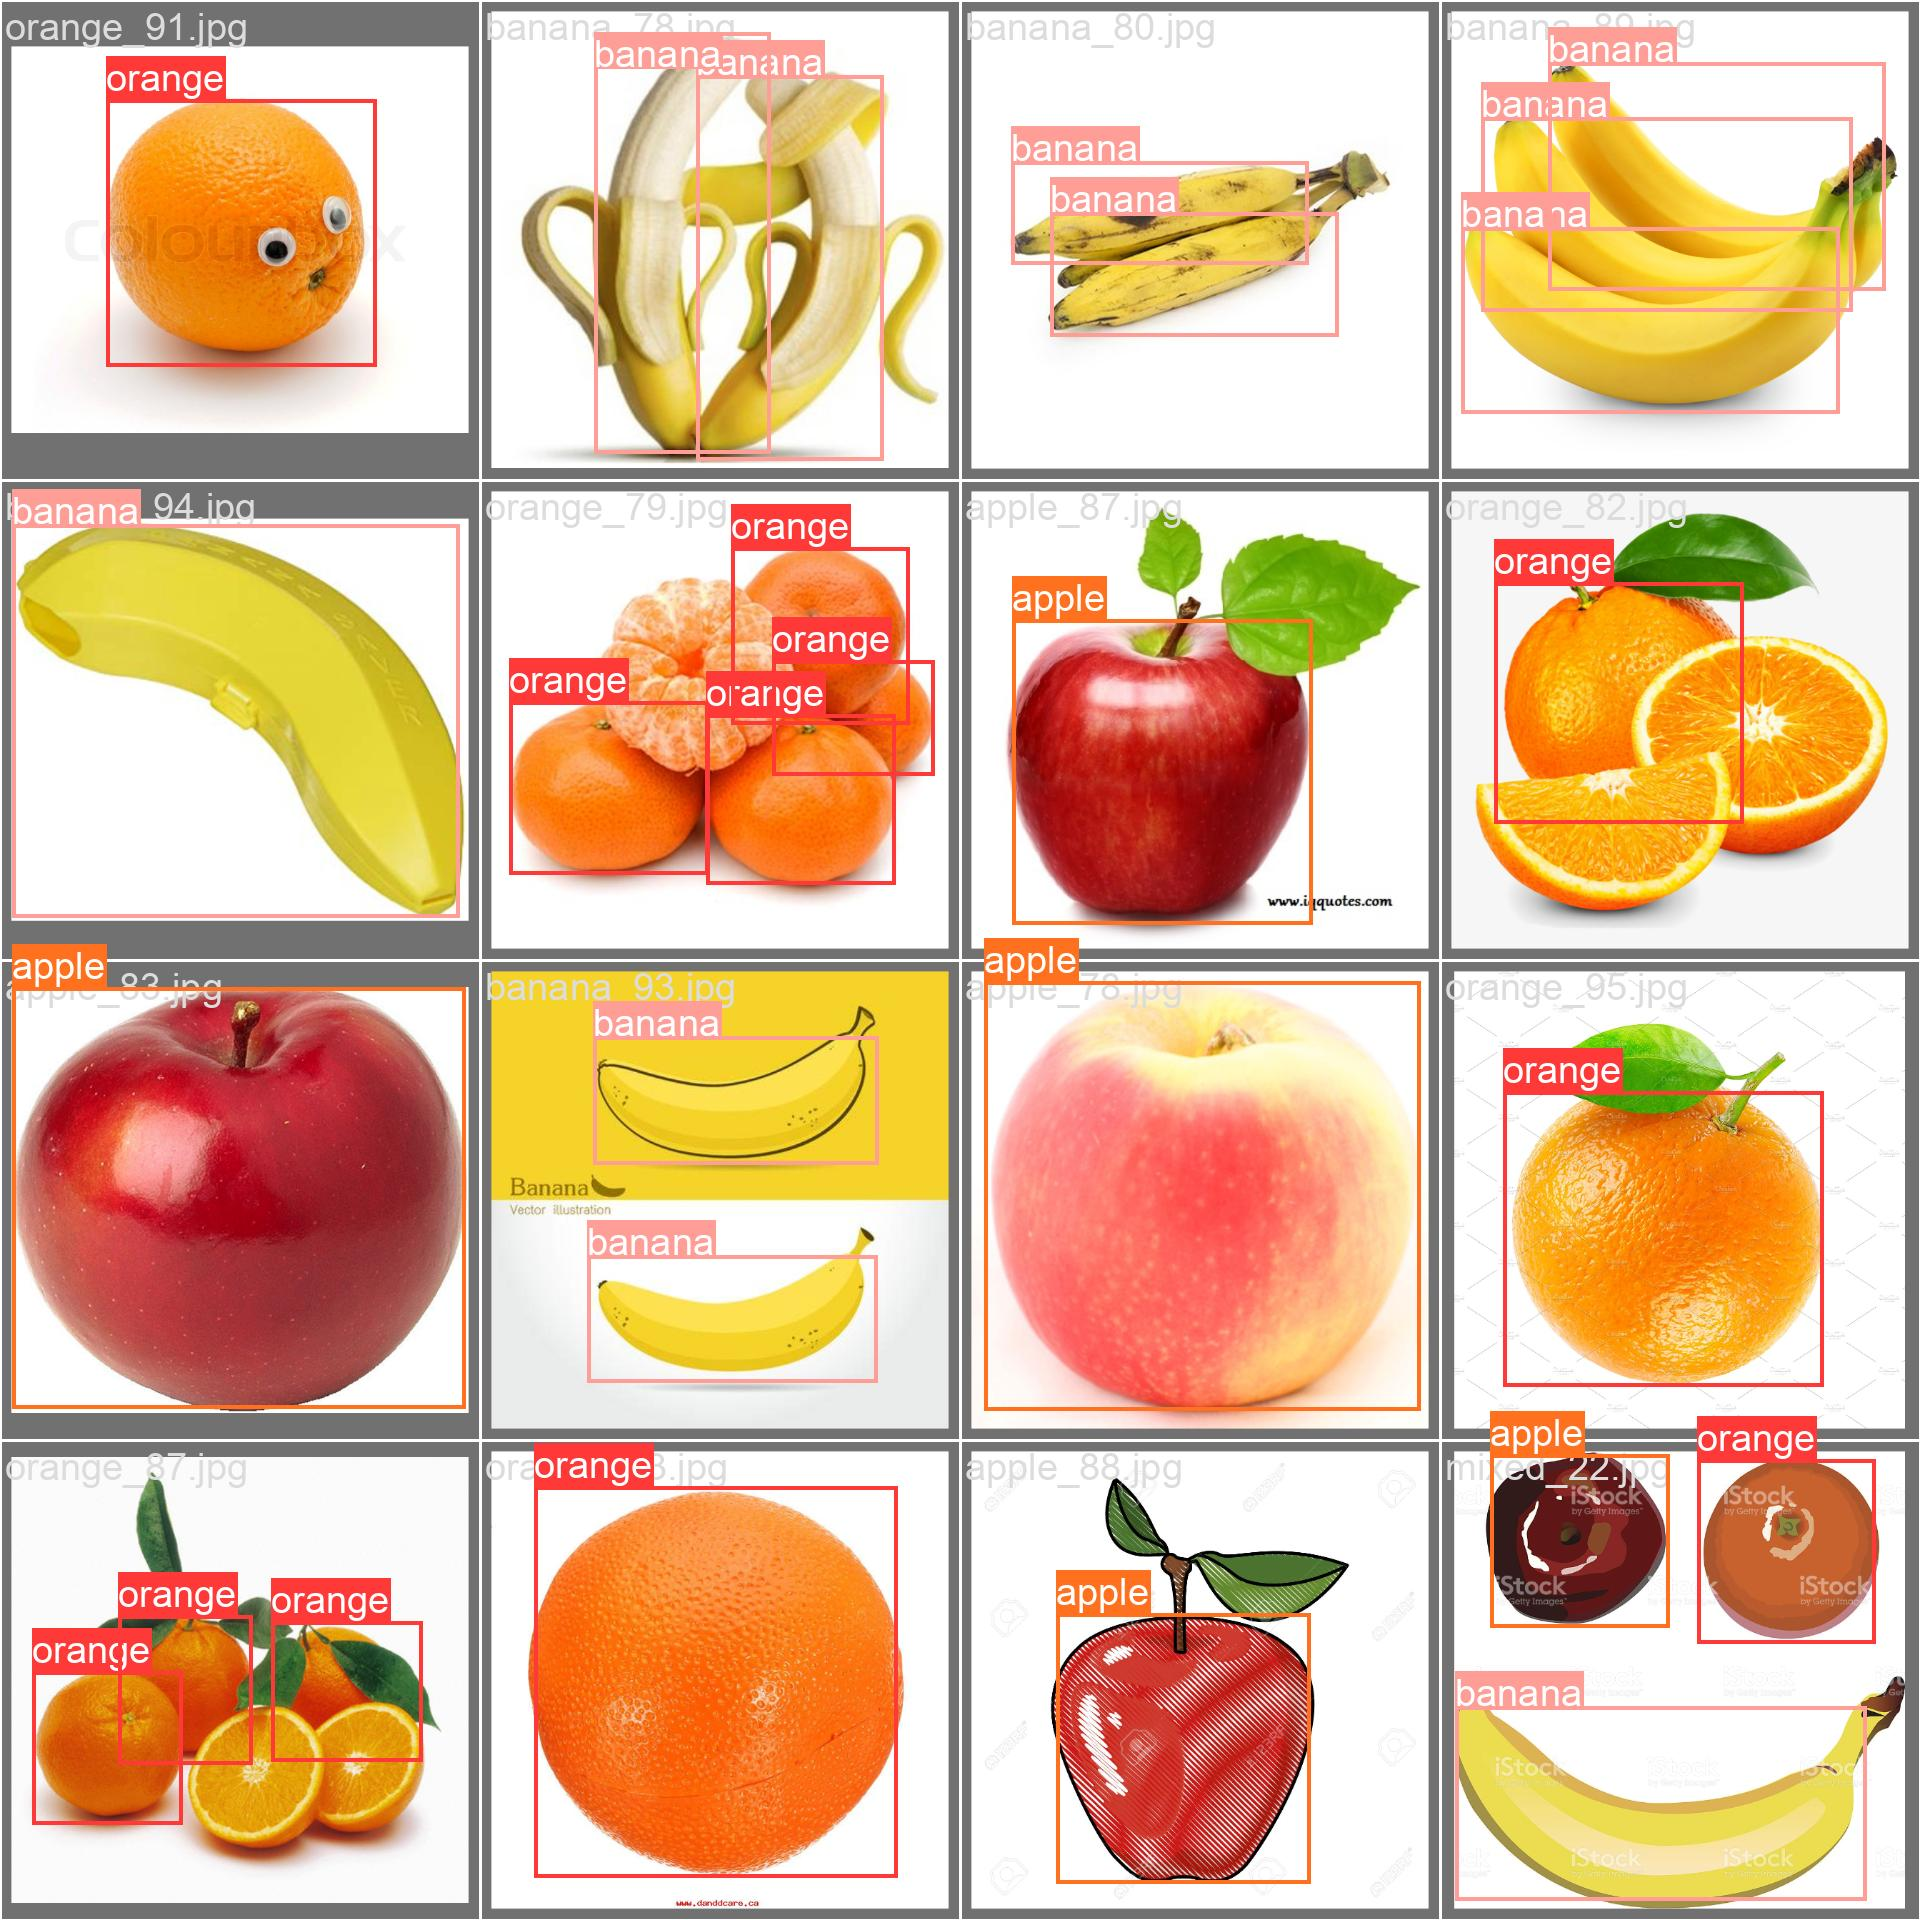

In [ ]:
# Image before validate
Image(filename ="runs/detect/train2/val_batch1_labels.jpg")


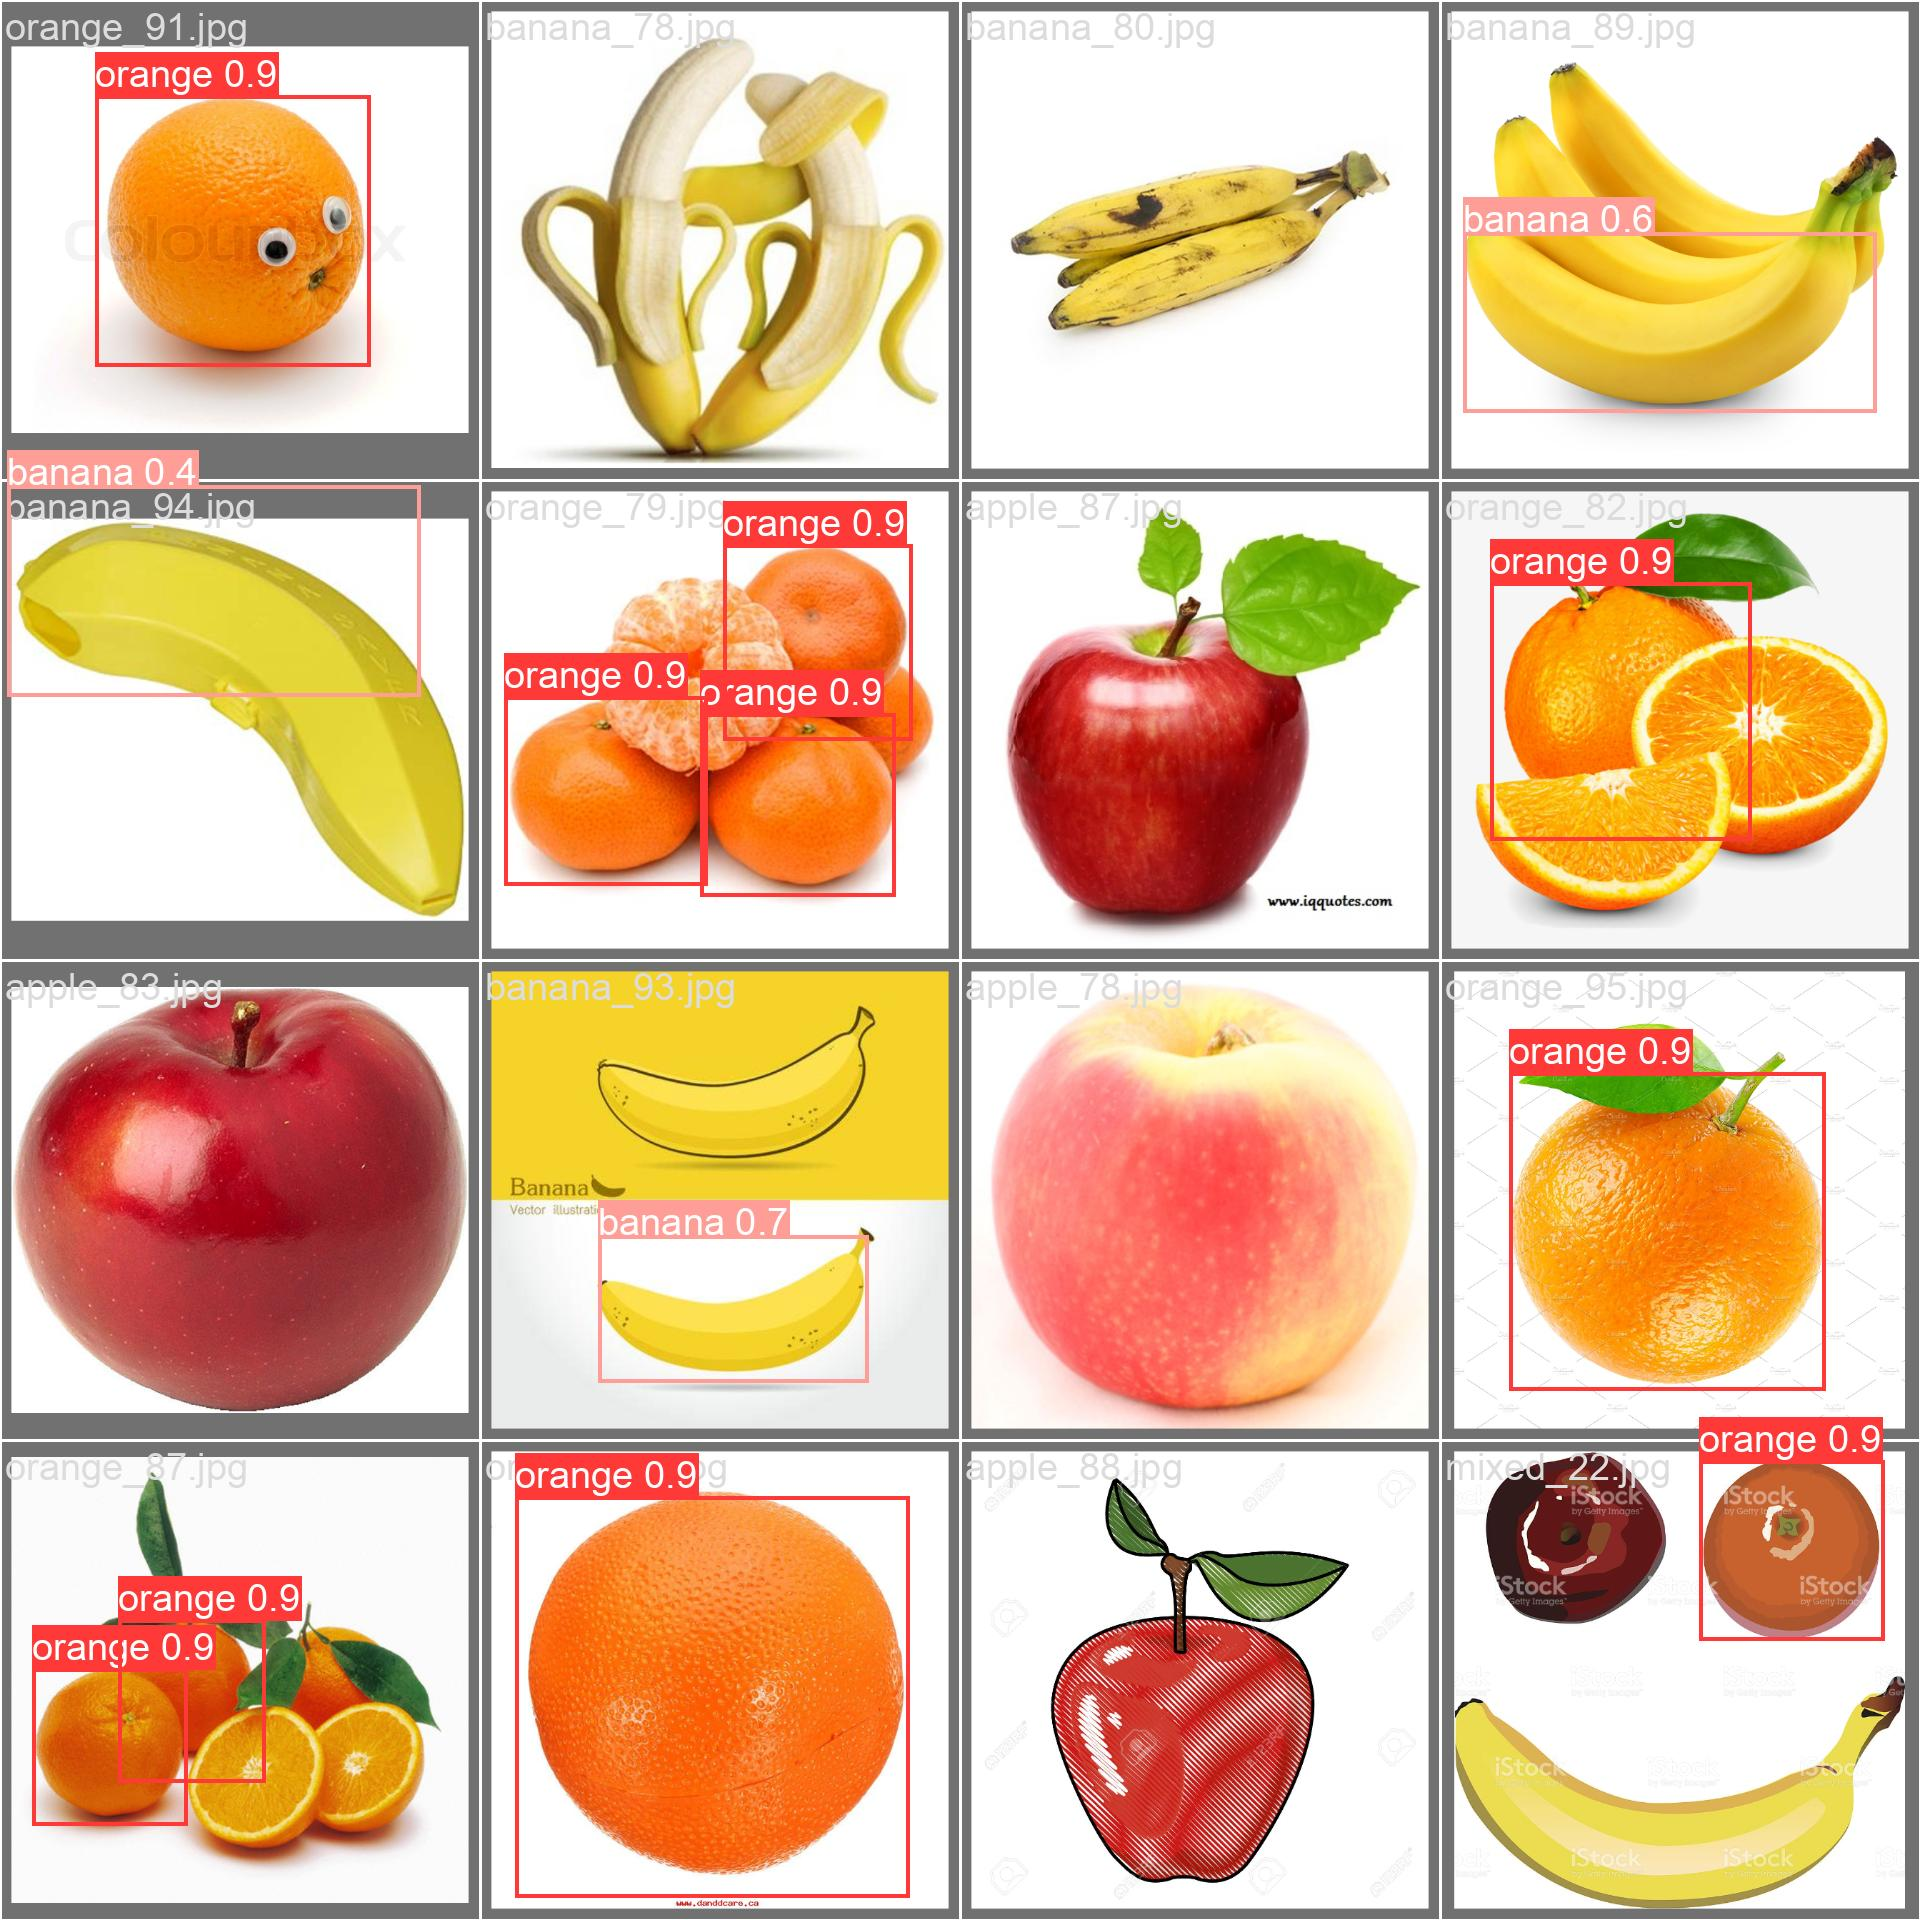

In [ ]:
#Predicted Image
Image(filename ="runs/detect/train2/val_batch1_pred.jpg")

## Predicting whole Test data

In [ ]:
os.chdir("/content/drive/MyDrive/Computer vision Project/")

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data =Data/data.yaml

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Computer vision Project/Data/labels/test.cache... 56 images, 0 backgrounds, 0 corrupt: 100% 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:16<00:00,  4.15s/it]
                   all         56        110      0.738      0.381      0.501      0.343
                orange         56         41      0.836      0.829      0.884      0.633
                banana         56         36      0.559      0.177      0.225      0.106
                 apple         56         33      0.818      0.137      0.395      0.291
Speed: 5.0ms preprocess, 211.3ms inference, 0.0ms loss, 31.5ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt source=Data/images/test

Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/56 /content/drive/MyDrive/Computer vision Project/Data/images/test/apple_77.jpg: 512x640 (no detections), 165.5ms
image 2/56 /content/drive/MyDrive/Computer vision Project/Data/images/test/apple_78.jpg: 640x640 (no detections), 166.7ms
image 3/56 /content/drive/MyDrive/Computer vision Project/Data/images/test/apple_80.jpg: 544x640 (no detections), 136.9ms
image 4/56 /content/drive/MyDrive/Computer vision Project/Data/images/test/apple_81.jpg: 640x576 (no detections), 130.2ms
image 5/56 /content/drive/MyDrive/Computer vision Project/Data/images/test/apple_82.jpg: 640x576 1 apple, 127.6ms
image 6/56 /content/drive/MyDrive/Computer vision Project/Data/images/test/apple_83.jpg: 608x640 (no detections), 147.7ms
image 7/56 /content/drive/MyDrive/Computer vision Project/Data/images/test/apple_84.jpg: 448x640 (no detections

In [ ]:
#displaying predicted image
from IPython.display import display, Image

# List of image paths and detection information
image_info = [
    ("runs/detect/predict/apple_77.jpg", "512x640 (no detections), 165.5ms"),
    ("runs/detect/predict/apple_78.jpg", "640x640 (no detections), 166.7ms"),
    ("runs/detect/predict/apple_80.jpg", "544x640 (no detections), 136.9ms"),
    ("runs/detect/predict/apple_81.jpg", "640x576 (no detections), 130.2ms"),
    ("runs/detect/predict/apple_82.jpg", "640x576 1 apple, 127.6ms"),
    ("runs/detect/predict/apple_83.jpg", "608x640 (no detections), 147.7ms"),
    ("runs/detect/predict/apple_84.jpg", "448x640 (no detections), 110.0ms"),
    ("runs/detect/predict/apple_85.jpg", "512x640 (no detections), 104.7ms"),
    ("runs/detect/predict/apple_86.jpg", "448x640 3 apples, 93.8ms"),
    ("runs/detect/predict/apple_87.jpg", "640x640 (no detections), 141.9ms"),
    ("runs/detect/predict/apple_88.jpg", "640x640 (no detections), 136.1ms"),
    ("runs/detect/predict/apple_89.jpg", "640x576 (no detections), 118.5ms"),
    ("runs/detect/predict/apple_90.jpg", "640x608 (no detections), 141.2ms"),
    ("runs/detect/predict/apple_91.jpg", "384x640 (no detections), 98.4ms"),
    ("runs/detect/predict/apple_93.jpg", "448x640 (no detections), 94.9ms"),
    ("runs/detect/predict/apple_94.jpg", "448x640 (no detections), 102.7ms"),
    ("runs/detect/predict/apple_95.jpg", "416x640 (no detections), 100.1ms"),
    ("runs/detect/predict/banana_77.jpg", "640x544 (no detections), 135.8ms"),
    ("runs/detect/predict/banana_78.jpg", "640x640 (no detections), 134.7ms"),
    ("runs/detect/predict/banana_79.jpg", "416x640 1 banana, 85.2ms"),
    ("runs/detect/predict/banana_80.jpg", "640x640 (no detections), 133.8ms"),
    ("runs/detect/predict/banana_81.jpg", "480x640 1 banana, 120.0ms"),
    ("runs/detect/predict/banana_82.jpg", "448x640 (no detections), 101.5ms"),
    ("runs/detect/predict/banana_83.jpg", "384x640 (no detections), 86.6ms"),
    ("runs/detect/predict/banana_84.jpg", "384x640 (no detections), 89.7ms"),
    ("runs/detect/predict/banana_85.jpg", "384x640 (no detections), 81.8ms"),
    ("runs/detect/predict/banana_86.jpg", "640x448 (no detections), 106.6ms"),
    ("runs/detect/predict/banana_88.jpg", "480x640 (no detections), 109.8ms"),
    ("runs/detect/predict/banana_89.jpg", "640x640 1 banana, 145.3ms"),
    ("runs/detect/predict/banana_90.jpg", "384x640 1 banana, 87.7ms"),
    ("runs/detect/predict/banana_91.jpg", "448x640 1 orange, 104.9ms"),
    ("runs/detect/predict/banana_92.jpg", "640x640 (no detections), 141.9ms"),
    ("runs/detect/predict/banana_93.jpg", "640x640 1 banana, 135.3ms"),
    ("runs/detect/predict/banana_94.jpg", "576x640 1 banana, 141.6ms"),
    ("runs/detect/predict/mixed_21.jpg", "448x640 4 oranges, 97.8ms"),
    ("runs/detect/predict/mixed_22.jpg", "640x640 1 orange, 1 banana, 159.2ms"),
    ("runs/detect/predict/mixed_23.jpg", "480x640 (no detections), 112.2ms"),
    ("runs/detect/predict/mixed_24.jpg", "384x640 (no detections), 90.1ms"),
    ("runs/detect/predict/mixed_25.jpg", "480x640 1 orange, 102.5ms"),
    ("runs/detect/predict/orange_77.jpg", "480x640 5 oranges, 104.0ms"),
    ("runs/detect/predict/orange_78.jpg", "320x640 1 orange, 85.5ms"),
    ("runs/detect/predict/orange_79.jpg", "640x640 3 oranges, 129.6ms"),
    ("runs/detect/predict/orange_80.jpg", "480x640 1 orange, 120.7ms"),
    ("runs/detect/predict/orange_81.jpg", "512x640 3 oranges, 113.2ms"),
    ("runs/detect/predict/orange_82.jpg", "640x640 1 orange, 130.5ms"),
    ("runs/detect/predict/orange_83.jpg", "640x640 1 orange, 133.0ms"),
    ("runs/detect/predict/orange_84.jpg", "512x640 1 orange, 123.8ms"),
    ("runs/detect/predict/orange_85.jpg", "640x480 1 orange, 135.0ms"),
    ("runs/detect/predict/orange_86.jpg", "480x640 3 oranges, 149.0ms"),
    ("runs/detect/predict/orange_87.jpg", "640x640 2 oranges, 199.0ms"),
    ("runs/detect/predict/orange_89.jpg", "480x640 2 oranges, 142.9ms"),
    ("runs/detect/predict/orange_90.jpg", "512x640 5 oranges, 161.8ms"),
    ("runs/detect/predict/orange_91.jpg", "544x640 1 orange, 191.4ms"),
    ("runs/detect/predict/orange_92.jpg", "448x640 1 orange, 147.1ms"),
    ("runs/detect/predict/orange_93.jpg", "448x640 2 oranges, 133.5ms"),
    ("runs/detect/predict/orange_95.jpg", "640x640 1 orange, 219.3ms")
]



# Iterate over each image and display it along with detection information
for image_path, detection_info in image_info:
    display(Image(image_path,width=300))
    print("Detection Information:", detection_info)

Output hidden; open in https://colab.research.google.com to view.

sample_data/


## Video prediction

In [ ]:
video= os.path.join

In [ ]:
video=cv2.VideoCapture("/content/drive/MyDrive/Computer vision Project/Fruits Object Detection.ipynb")
ret,frame = video.read()
H,W =frame.shape
out =cv2.VideoWriter

In [ ]:



video_path_out = '{}_out.mp4'.format('BANANA APPLE AND ORANGE SMOOTHIE.mp4')

cap = cv2.VideoCapture("BANANA APPLE AND ORANGE SMOOTHIE.mp4")
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model

threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
0: 384x640 2 oranges, 129.8ms
Speed: 4.3ms preprocess, 129.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 oranges, 128.1ms
Speed: 5.5ms preprocess, 128.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 oranges, 126.5ms
Speed: 4.3ms preprocess, 126.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 oranges, 134.3ms
Speed: 4.2ms preprocess, 134.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 oranges, 141.0ms
Speed: 4.2ms preprocess, 141.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 oranges, 118.6ms
Speed: 4.8ms preprocess, 118.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 oranges, 122.0ms
Speed: 5.7ms preprocess, 122.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 oranges, 128.7ms
Speed: 6.7ms pre

In [8]:
os.chdir("/content/drive/MyDrive/Computer vision Project")

In [ ]:
os.chdir("/content/drive/MyDrive/Computer vision Project")

In [ ]:
VIDEOS_DIR = os.path.join('/content/drive/MyDrive/Computer vision Project', 'videos')


video_path_out = '{}_out.mp4'.format('English Learning - Fruit_ Apple, Orange, Banana, Pear.mp4')

cap = cv2.VideoCapture("English Learning - Fruit_ Apple, Orange, Banana, Pear.mp4")
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model

threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
0: 480x640 1 orange, 1 banana, 1 apple, 157.1ms
Speed: 3.6ms preprocess, 157.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 orange, 2 bananas, 1 apple, 170.5ms
Speed: 3.5ms preprocess, 170.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 orange, 1 banana, 1 apple, 162.9ms
Speed: 3.1ms preprocess, 162.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 orange, 1 apple, 165.8ms
Speed: 2.7ms preprocess, 165.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 orange, 1 banana, 1 apple, 172.4ms
Speed: 2.8ms preprocess, 172.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 orange, 1 apple, 167.2ms
Speed: 2.7ms preprocess, 167.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 orange, 1 banana, 1 apple, 159.2ms
Speed: 3.3ms preprocess, 159.2ms infer